<a href="https://colab.research.google.com/github/KeerthiVasan-ai/deep-learning-tools-lab/blob/main/5_Age_Prediction_2D_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/age_gender.csv")
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [ ]:
def str_to_array(pixels):
  return np.array(pixels.split(" "),dtype="int")

df["new_pixels"] = df["pixels"].apply(str_to_array)

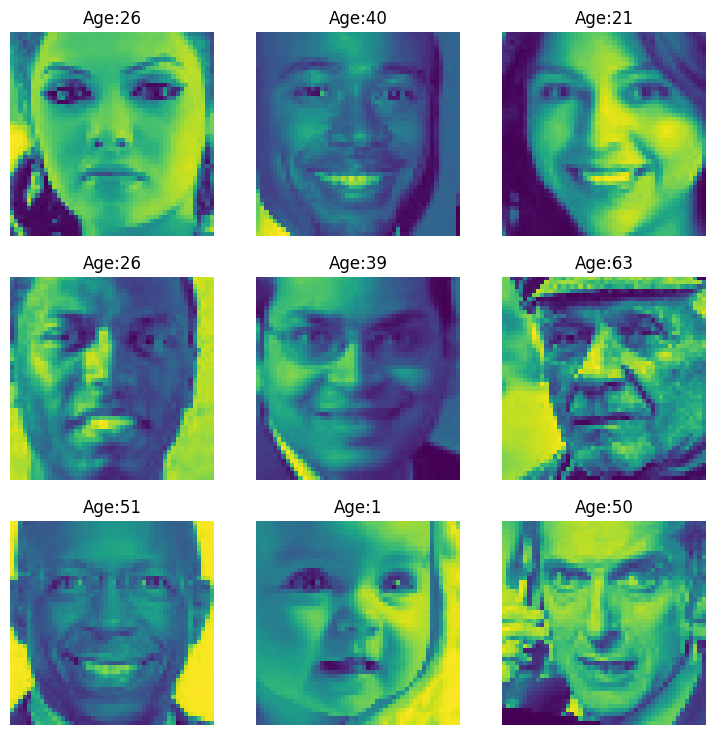

In [ ]:
import random

fig,ax = plt.subplots(3,3,figsize=(9,9))
ax = ax.ravel()

images = random.sample(range(0,df.shape[0]),9)

for index,image in enumerate(images):
  ax[index].imshow(df['new_pixels'].loc[image].reshape(48,48))
  ax[index].set_title(f"Age:{df.age.loc[image]}")
  ax[index].axis('off')
plt.show()

In [ ]:
X_new = pd.DataFrame(df['new_pixels'].tolist())

X = X_new
y = df['age'].values

X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2
)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(18964, 2304) (4741, 2304) (18964,) (4741,)


In [ ]:
X_train = X_train.values
X_train = X_train / 255
X_train = X_train.reshape(-1,48,48,1)

X_val = X_test.values
X_val = X_val / 255
X_val = X_val.reshape(-1,48,48,1)

In [ ]:
from tensorflow.keras.models import Sequential

model = Sequential([
    layers.InputLayer(input_shape=(48,48,1)),
    layers.Conv2D(16,3,activation="relu"),
    layers.Conv2D(32,3,activation="relu"),
    layers.MaxPooling2D(3),
    layers.Conv2D(64,3,activation="relu"),
    layers.Conv2D(64,3,activation="relu"),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(1,activation="linear")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                        

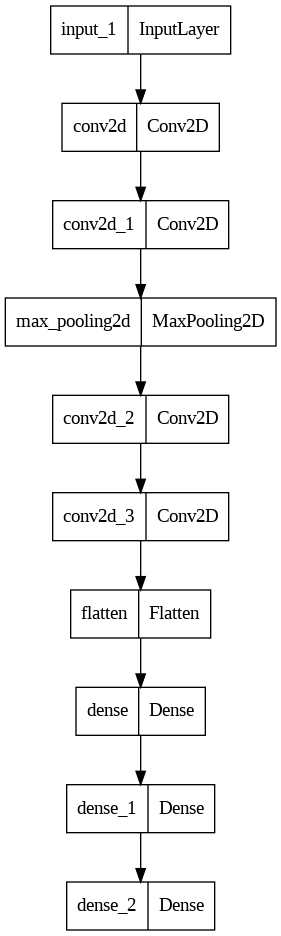

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
model.compile(
    loss = tf.keras.losses.MeanAbsoluteError(),
    metrics = ["MAE"],
    optimizer = 'adam'
)

In [ ]:
history = model.fit(
    X_train,y_train,
    batch_size = 256,
    validation_data = (X_val,y_test),
    epochs = 2,
)

Epoch 1/2
75/75 [==============================] - 90s 1s/step - loss: 17.8969 - MAE: 17.8969 - val_loss: 15.7996 - val_MAE: 15.7996
Epoch 2/2
75/75 [==============================] - 81s 1s/step - loss: 14.7087 - MAE: 14.7087 - val_loss: 14.6723 - val_MAE: 14.6723


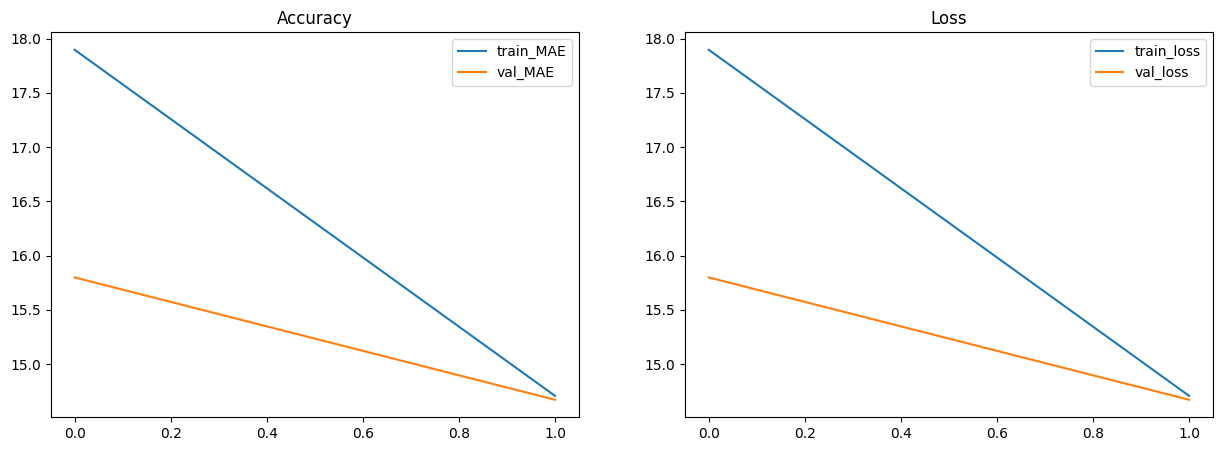

In [ ]:
history = history.history

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Accuracy")
plt.plot(history["MAE"],label="train_MAE")
plt.plot(history["val_MAE"],label="val_MAE")
plt.legend()

plt.subplot(122)
plt.title("Loss")
plt.plot(history["loss"],label="train_loss")
plt.plot(history["val_loss"],label="val_loss")
plt.legend()

In [ ]:
loss,accuracy = model.evaluate(X_val,y_test)

print(loss,accuracy)

149/149 [==============================] - 5s 34ms/step - loss: 14.6723 - MAE: 14.6723
14.67232608795166 14.67232608795166


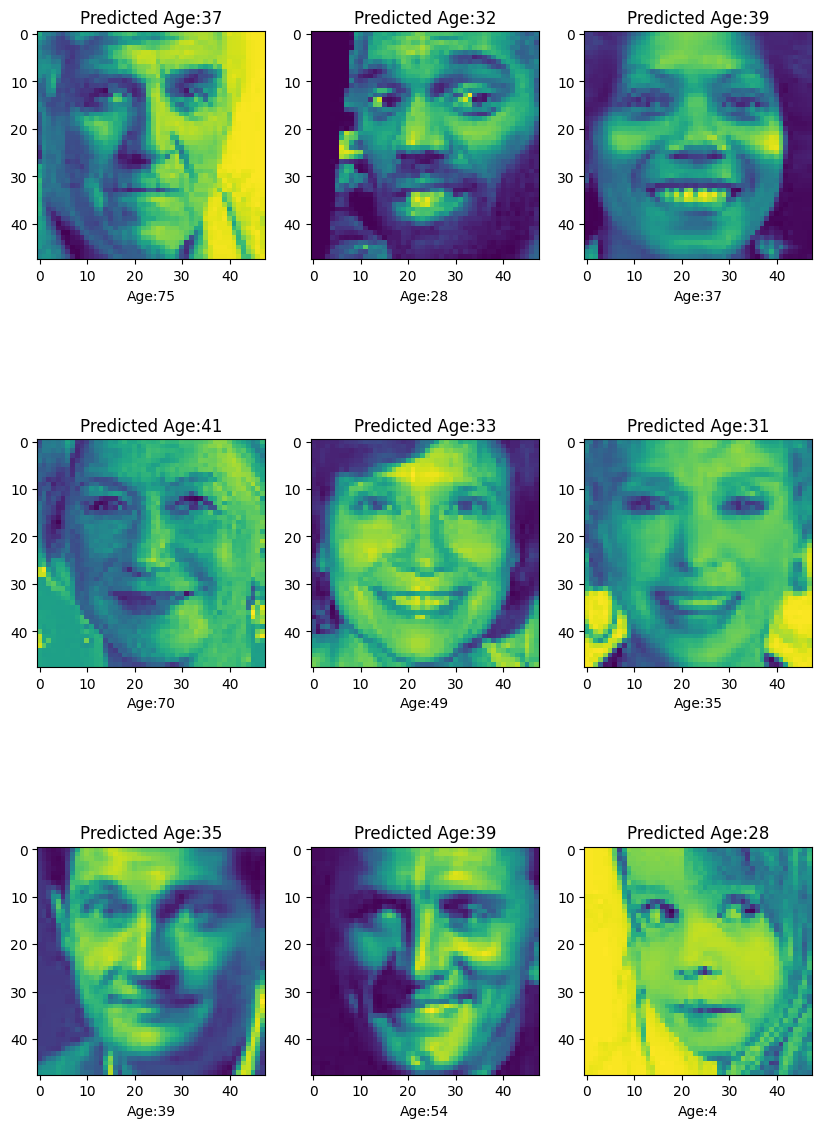

In [ ]:
import random

fig,ax = plt.subplots(3,3,figsize=(10,15))
ax = ax.ravel()

images = random.sample(range(0,X_val.shape[0]),9)

for index,image in enumerate(images):
  ax[index].imshow(X_val[image])
  predicted_age = model.predict(tf.expand_dims(X_val[image],0),verbose=0)
  ax[index].set_title(f"Predicted Age:{int(predicted_age[0][0])}")
  ax[index].set_xlabel(f"Age:{y_test[image]}")
  # ax[index].axis('off')
plt.show()